Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Step 2: Load and Explore Data

In [ ]:
# Load the dataset
df = pd.read_csv('Tweets.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get some statistics of the data
print(df.describe())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

Step 3: Text Preprocessing

In [ ]:
# Remove any rows with missing text
df = df.dropna(subset=['text'])

# Lowercase the text
df['text'] = df['text'].str.lower()

# Remove special characters, links, and punctuation
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['text'] = df['text'].replace(r'[^a-zA-Z\s]', '', regex=True)

# Tokenization (splitting text into words)
nltk.download('punkt')
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# Remove stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords])

# Join tokens back into a single string
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Step 4: Sentiment Analysis

In [ ]:
# Remove any rows with missing text
df = df.dropna(subset=['text'])

# Lowercase the text
df['text'] = df['text'].str.lower()

# Remove special characters, links, and punctuation
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['text'] = df['text'].replace(r'[^a-zA-Z\s]', '', regex=True)

# Tokenization (splitting text into words)
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords])

# Join tokens back into a single string
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each post
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])


Step 5: Visualization

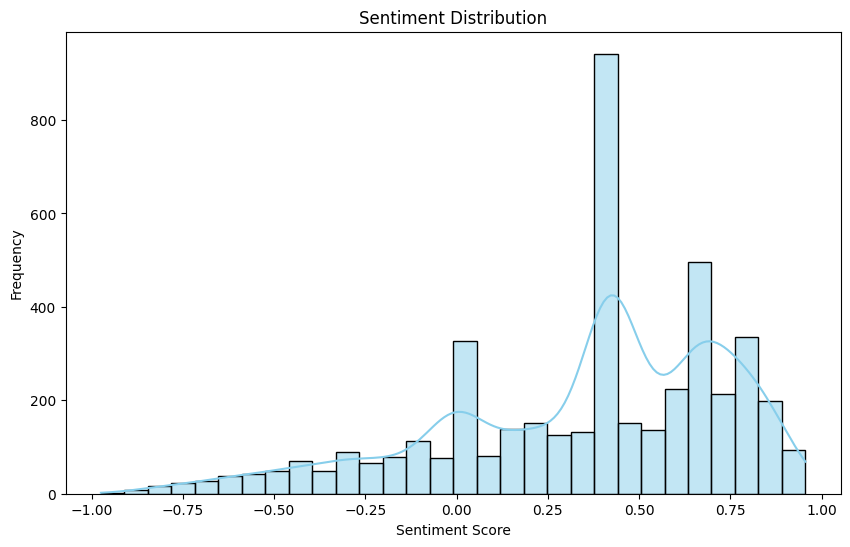

In [ ]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

Word Cloud

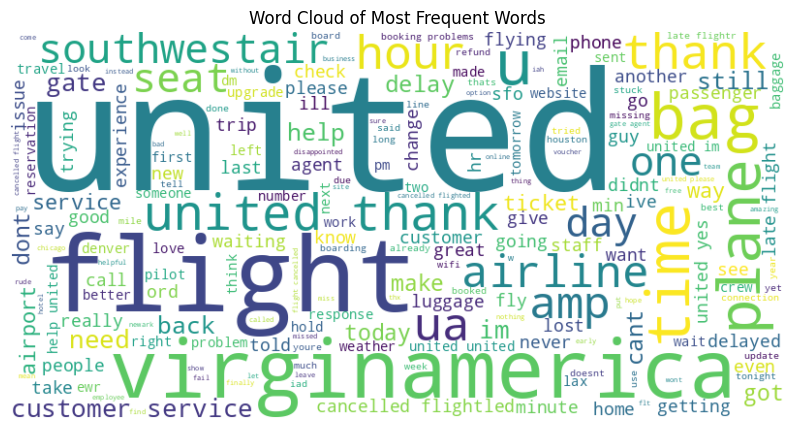

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud of most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()